In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 12

## Exercise 1 
<hr>

In [2]:
class Perceptron:
    """
    A simple Rosenblatt Perceptron implementation.
    """

    def __init__(self, n_inputs, learning_rate=0.1):
        """
        Initialise the perceptron.
 
        Parameters:
        -----------
        n_inputs : int
            Number of input features
        learning_rate : float
            Learning rate (alpha) for weight updates

        """

        self.weights = np.random.uniform(-0.5, 0.5, size=n_inputs)
        self.bias = np.random.uniform(-0.5, 0.5)
        self.learning_rate = learning_rate

    def step_function(self, x):
        """
        Step activation function

        Returns 1 if x >= 0, else returns 0
        """
        
        if int(x >= 0):
            return 1
        
        else:
            return 0
        
    
    def predict(self, inputs):
        """
        Compute the perceptron output for given inputs.
        
        Parameters:
        -----------
        inputs : array-like
            Input values (x1, x2, ...)
        
        Returns:
        --------
        int : 0 or 1
        """

        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.step_function(weighted_sum)
    
    
    def train(self, X, y, epochs, verbose=True):
        """
        Train the perceptron using the perceptron learning rule.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Training inputs
        y : array-like, shape (n_samples,)
            Target outputs (0 or 1)
        epochs : int
            Number of training epochs
        verbose : bool
            If True, print weights after each epoch
        
        Returns:
        --------
        list : History of (weights, bias) tuples for each epoch
        """
        
        history = []
    
        # Store initial weights
        history.append((self.weights.copy(), self.bias))
    
        for epoch in range(epochs):
            total_error = 0
    
            for i in range(len(X)):
                # Get prediction
                prediction = self.predict(X[i])
    
                # Calculate error
                error = y[i] - prediction
                total_error += abs(error)
    
                # Update weights and bias
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error
    
            # Store weights after this epoch
            history.append((self.weights.copy(), self.bias))
        
            if verbose:
                print(f"Epoch {epoch + 1}: weights = {self.weights}, self.bias = {self.bias:.4f}, errors = {total_error}")
            
            # Early stopping if no errors
            if total_error == 0:
                if verbose:
                    print(f"Converged after {epoch + 1} epochs!")
                break
        
        return history


## Exercise 2
<hr>

### 2.1 Define Training Data

In [3]:
# All input combinations
X_and = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_and = np.array([0, 0, 0, 1])

print("AND Training Data:")
print("X:")
print(X_and)
print("y:", y_and)

AND Training Data:
X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [0 0 0 1]


### 2.2 Train and Test Perceptron

In [4]:
# Create perceptron
perceptron_and = Perceptron(n_inputs=2, learning_rate=0.1)

print("Initial weights:", perceptron_and.weights)
print("Initial bias:", perceptron_and.bias)
print("\nTraining...\n")

# Train (store the history for later visualisation)
history_and = perceptron_and.train(X_and, y_and, epochs=10)

# Test on all inputs
print("\nTesting AND perceptron:")
print("-" * 40)
all_correct = True

for i in range(len(X_and)):
    prediction = perceptron_and.predict(X_and[i])
    correct = "✓" if prediction == y_and[i] else "✗"
    
    if prediction != y_and[i]:
        all_correct = False
    
    print(f"Input: {X_and[i]} -> Predicted: {prediction}, Expected: {y_and[i]} {correct}")

print("-" * 40)
print(f"All predictions correct: {all_correct}")

Initial weights: [-0.12545988  0.45071431]
Initial bias: 0.2319939418114051

Training...

Epoch 1: weights = [-0.12545988  0.35071431], self.bias = 0.0320, errors = 2
Epoch 2: weights = [-0.02545988  0.35071431], self.bias = -0.0680, errors = 3
Epoch 3: weights = [-0.02545988  0.25071431], self.bias = -0.1680, errors = 1
Epoch 4: weights = [0.07454012 0.25071431], self.bias = -0.1680, errors = 2
Epoch 5: weights = [0.17454012 0.25071431], self.bias = -0.1680, errors = 2
Epoch 6: weights = [0.17454012 0.15071431], self.bias = -0.2680, errors = 1
Epoch 7: weights = [0.17454012 0.15071431], self.bias = -0.2680, errors = 0
Converged after 7 epochs!

Testing AND perceptron:
----------------------------------------
Input: [0 0] -> Predicted: 0, Expected: 0 ✓
Input: [0 1] -> Predicted: 0, Expected: 0 ✓
Input: [1 0] -> Predicted: 0, Expected: 0 ✓
Input: [1 1] -> Predicted: 1, Expected: 1 ✓
----------------------------------------
All predictions correct: True


### 2.3 Visualise Decision Boundary

In [5]:
# Plotting function
def plot_decision_boundary(X, y, weights, bias, title="Decision Boundary", ax=None):
    """
    Plot data points and decision boundary.
    Parameters:
    -----------
    X : array-like, shape (n_samples, 2)
        Input data points
    y : array-like, shape (n_samples,)
        Labels (0 or 1)
    weights : array-like, shape (2,)
        Perceptron weights [w1, w2]
    bias : float
        Perceptron bias
    title : str
        Plot title
    ax : matplotlib axis (optional)
        Axis to plot on. If None, creates new figure.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot points
    for i in range(len(X)):
        if y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], c='red', marker='o', s=200,
                        edgecolors='black', linewidths=2, label='y=0' if i == 0 else '')

        else:
            ax.scatter(X[i, 0], X[i, 1], c='green', marker='s', s=200,
                        edgecolors='black', linewidths=2, label='y=1' if i == 3 else '')

    # Plot decision boundary
    # Line: w1*x1 + w2*x2 + b = 0
    # => x2 = -(w1/w2)*x1 - b/w2
    
    x1_range = np.linspace(-0.5, 1.5, 100)
    
    if abs(weights[1]) > 1e-10: # Avoid division by zero
        x2_boundary = -(weights[0] / weights[1]) * x1_range - (bias / weights[1])
        ax.plot(x1_range, x2_boundary, 'b-', linewidth=2, label='Decision boundary')

    else:
        # Vertical line case
        if abs(weights[0]) > 1e-10:
            x1_boundary = -bias / weights[0]
            ax.axvline(x=x1_boundary, color='b', linewidth=2, label='Decision boundary')

    # Formatting
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlabel('$x_1$', fontsize=14)
    ax.set_ylabel('$x_2$', fontsize=14)
    ax.set_title(title, fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left')
    ax.set_aspect('equal')
    
    return ax

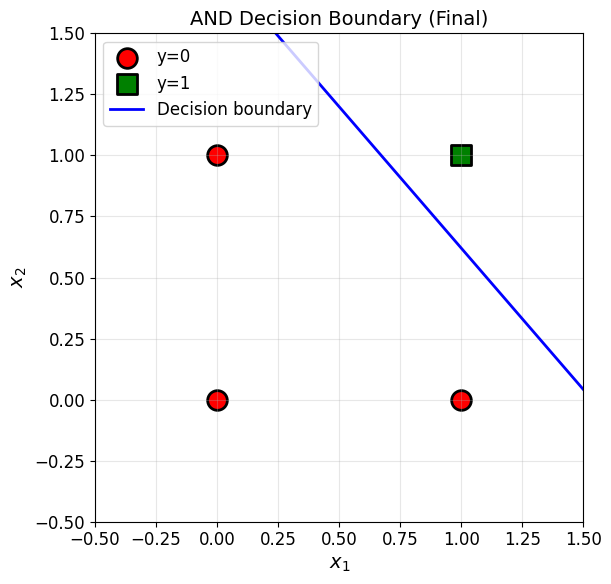

In [6]:
# Test the plotting function with the trained AND perceptron
plot_decision_boundary(X_and, y_and, perceptron_and.weights, perceptron_and.bias,
"AND Decision Boundary (Final)")
plt.tight_layout()
plt.show()

### 2.4 Animate the Learning Process

In [7]:
# Visualise decision boundary evolution across epochs
def plot_training_evolution(X, y, history, title_prefix=""):
    """
    Plot decision boundary evolution across epochs
    """

    n_epochs = len(history)

    # Determine grid size
    n_cols = min(5, n_epochs)
    n_rows = (n_epochs + n_epochs - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4 * n_rows))

    # Handle single row case 
    if n_rows == 1:
        axes = axes.reshape(1, -1)

    for idx, (weights, bias) in enumerate(history):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row, col]

        epoch_label = "Initial" if idx == 0 else f"Epoch {idx}"
        plot_decision_boundary(X, y, weights, bias, 
                               f"{title_prefix}{epoch_label}", ax=ax)
        
    # Hide empty subplots
    for idx in range(n_epochs, n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

AND - Decision Boundary Evolution:


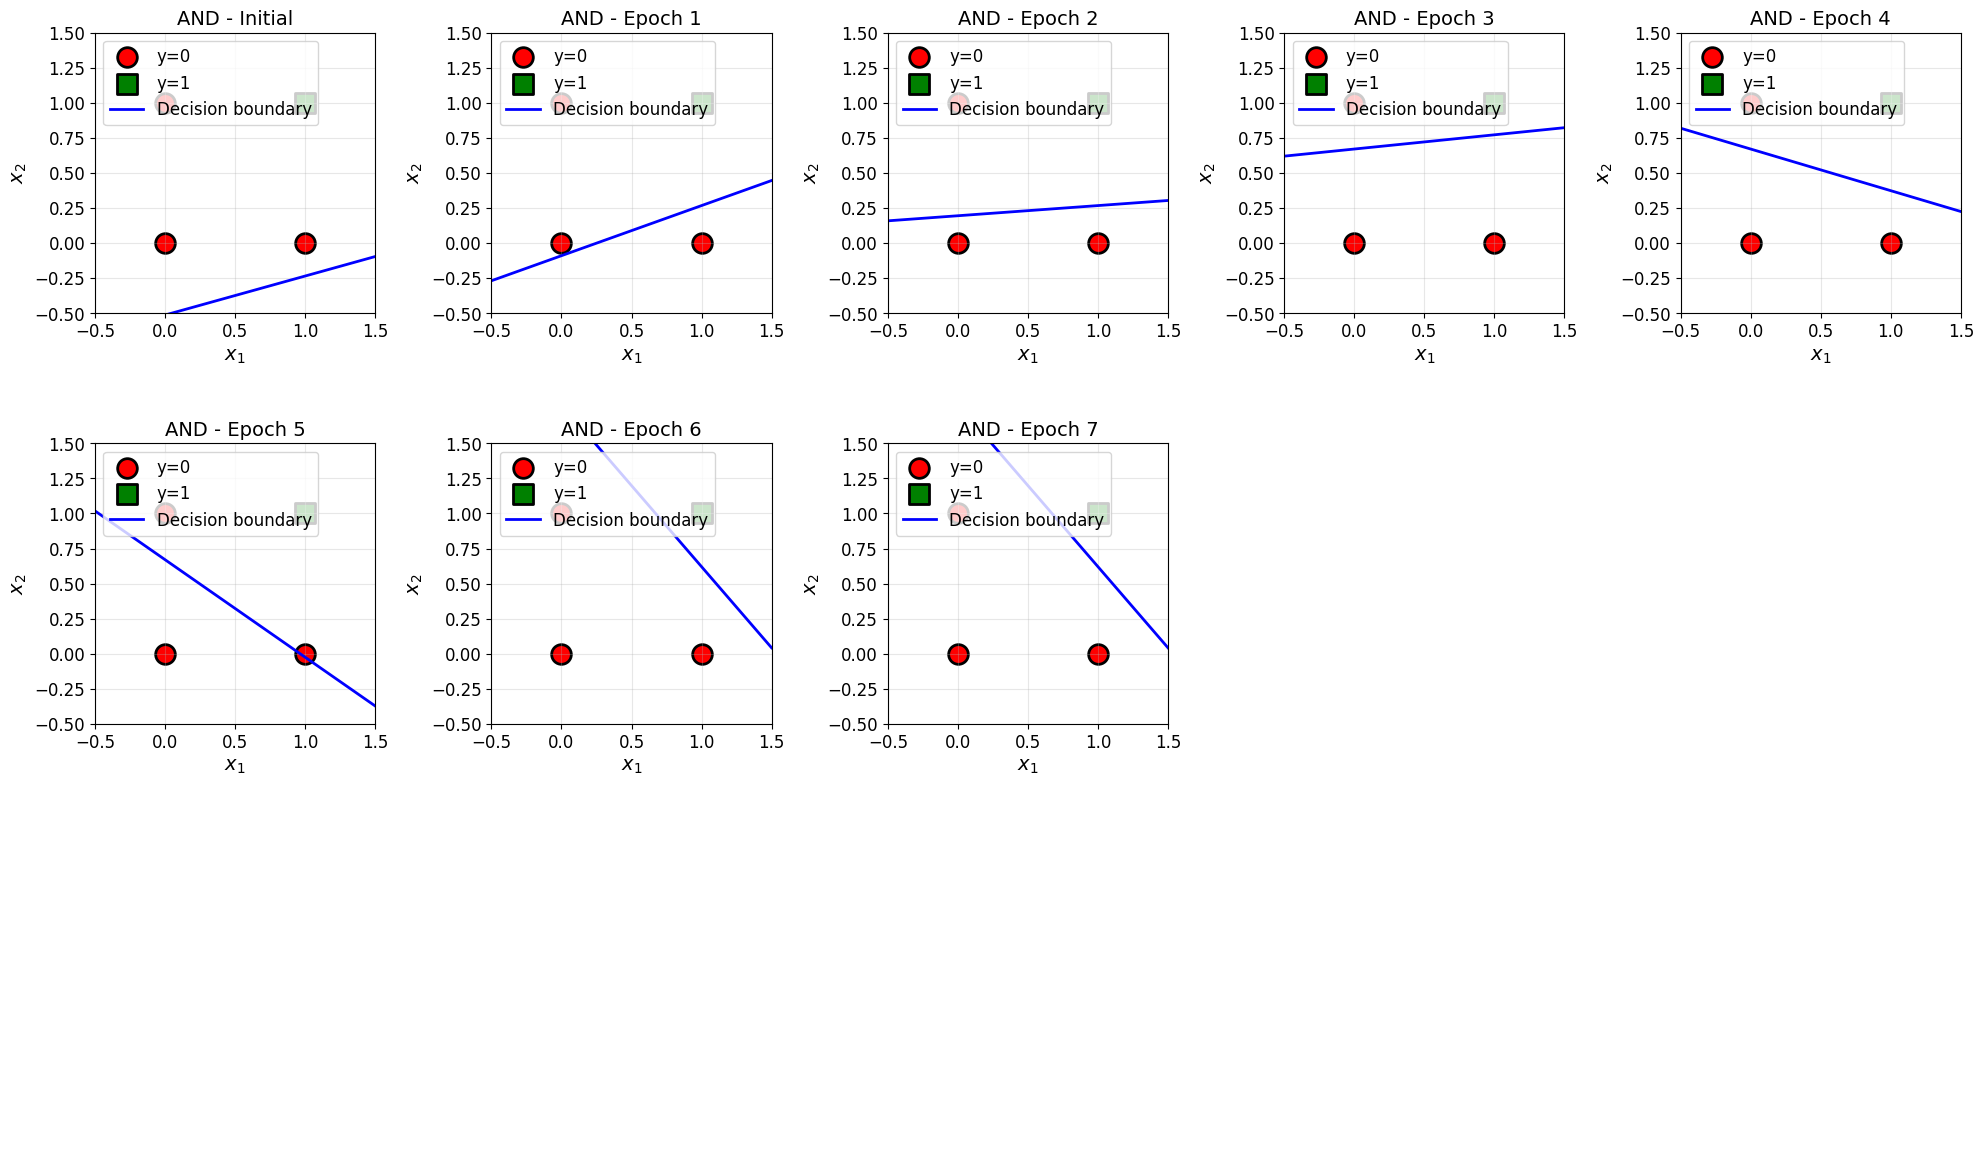

In [8]:
# Plot AND training evolution
print("AND - Decision Boundary Evolution:")
plot_training_evolution(X_and, y_and, history_and, "AND - ")

### 2.5 Display Weight Update Tables

In [9]:
import pandas as pd

def create_weight_table(history):
    """
    Create a pandas DataFrame showing weights at each epoch.
    """

    data = {
        'Epoch': [],
        'w1': [],
        'w2': [],
        'bias': []
    }

    for epoch, (weights, bias) in enumerate(history):
        data['Epoch'].append('Initial' if epoch == 0 else epoch)
        data['w1'].append(f"{weights[0]:.4f}")
        data['w2'].append(f"{weights[1]:.4f}")
        data['bias'].append(f"{bias:.4f}")

    return pd.DataFrame(data)

In [10]:
print("AND - Weight History Table:")
df_and = create_weight_table(history_and)
display(df_and)

AND - Weight History Table:


,Epoch,w1,w2,bias
0,Initial,-0.1255,0.4507,0.2320
1,1,-0.1255,0.3507,0.0320
2,2,-0.0255,0.3507,-0.0680
3,3,-0.0255,0.2507,-0.1680
4,4,0.0745,0.2507,-0.1680
5,5,0.1745,0.2507,-0.1680
6,6,0.1745,0.1507,-0.2680
7,7,0.1745,0.1507,-0.2680


## Exercise 3
<hr>

### 3.1 Define Data, Train, and Visualise

In [11]:
X_or = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_or = np.array([0, 1, 1, 1])

print("OR Training Data:")
print("X:")
print(X_or)
print("y:", y_or)

OR Training Data:
X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [0 1 1 1]


In [12]:
# Create perceptron
perceptron_or = Perceptron(n_inputs=2, learning_rate=0.1)

print("Initial weights:", perceptron_or.weights)
print("Initial bias:", perceptron_or.bias)
print("\nTraining...\n")

# Train (store the history for later visualisation)
history_or = perceptron_or.train(X_or, y_or, epochs=10)

# Test on all inputs
print("\nTesting OR perceptron:")
print("-" * 40)
all_correct = True

for i in range(len(X_or)):
    prediction = perceptron_or.predict(X_or[i])
    correct = "✓" if prediction == y_or[i] else "✗"
    
    if prediction != y_or[i]:
        all_correct = False
    
    print(f"Input: {X_or[i]} -> Predicted: {prediction}, Expected: {y_or[i]} {correct}")

print("-" * 40)
print(f"All predictions correct: {all_correct}")

Initial weights: [ 0.09865848 -0.34398136]
Initial bias: -0.34400547966379735

Training...

Epoch 1: weights = [ 0.29865848 -0.14398136], self.bias = -0.0440, errors = 3
Epoch 2: weights = [ 0.29865848 -0.04398136], self.bias = 0.0560, errors = 1
Epoch 3: weights = [0.29865848 0.05601864], self.bias = 0.0560, errors = 2
Epoch 4: weights = [0.29865848 0.05601864], self.bias = -0.0440, errors = 1
Epoch 5: weights = [0.29865848 0.05601864], self.bias = -0.0440, errors = 0
Converged after 5 epochs!

Testing OR perceptron:
----------------------------------------
Input: [0 0] -> Predicted: 0, Expected: 0 ✓
Input: [0 1] -> Predicted: 1, Expected: 1 ✓
Input: [1 0] -> Predicted: 1, Expected: 1 ✓
Input: [1 1] -> Predicted: 1, Expected: 1 ✓
----------------------------------------
All predictions correct: True


<Axes: title={'center': 'OR - Decison Decision Boundary'}, xlabel='$x_1$', ylabel='$x_2$'>

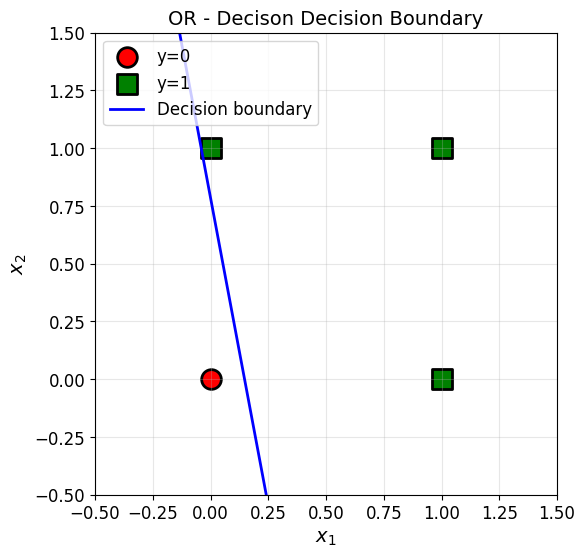

In [13]:
# Plot decision boundary
plot_decision_boundary(X_or, y_or, perceptron_or.weights, perceptron_or.bias, 
                       "OR - Decison Decision Boundary")

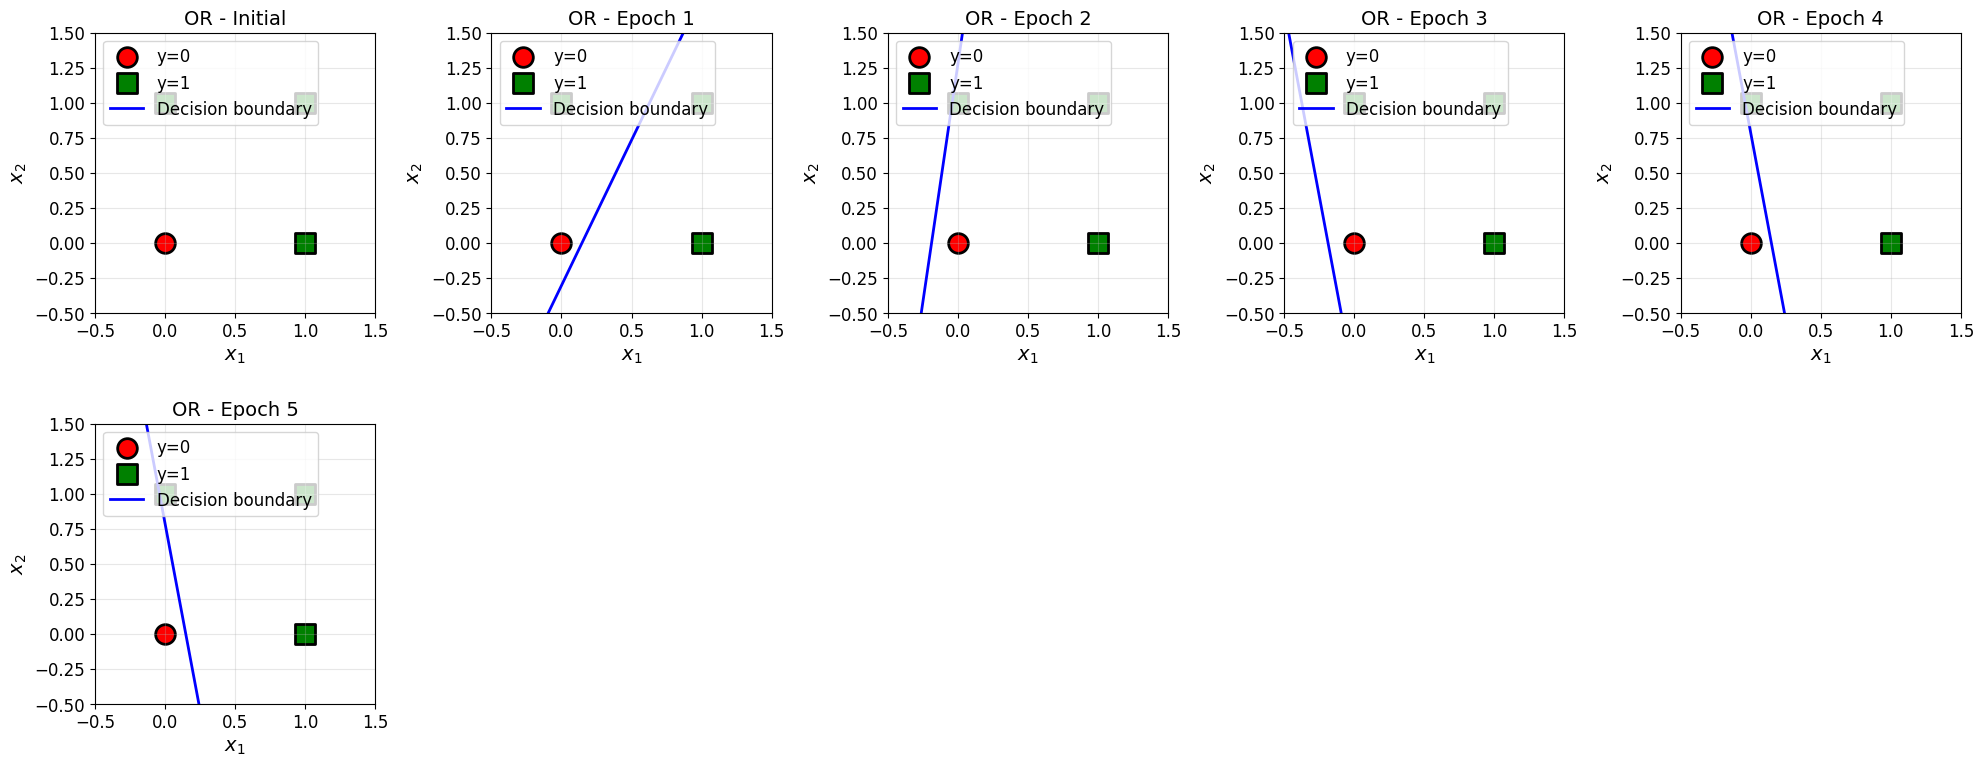

In [14]:
plot_training_evolution(X_or, y_or, history_or, "OR - ")

In [15]:
create_weight_table(history_or)

,Epoch,w1,w2,bias
0,Initial,0.0987,-0.3440,-0.3440
1,1,0.2987,-0.1440,-0.0440
2,2,0.2987,-0.0440,0.0560
3,3,0.2987,0.0560,0.0560
4,4,0.2987,0.0560,-0.0440
5,5,0.2987,0.0560,-0.0440


### 3.2 Compare AND and OR Decision Boundaries

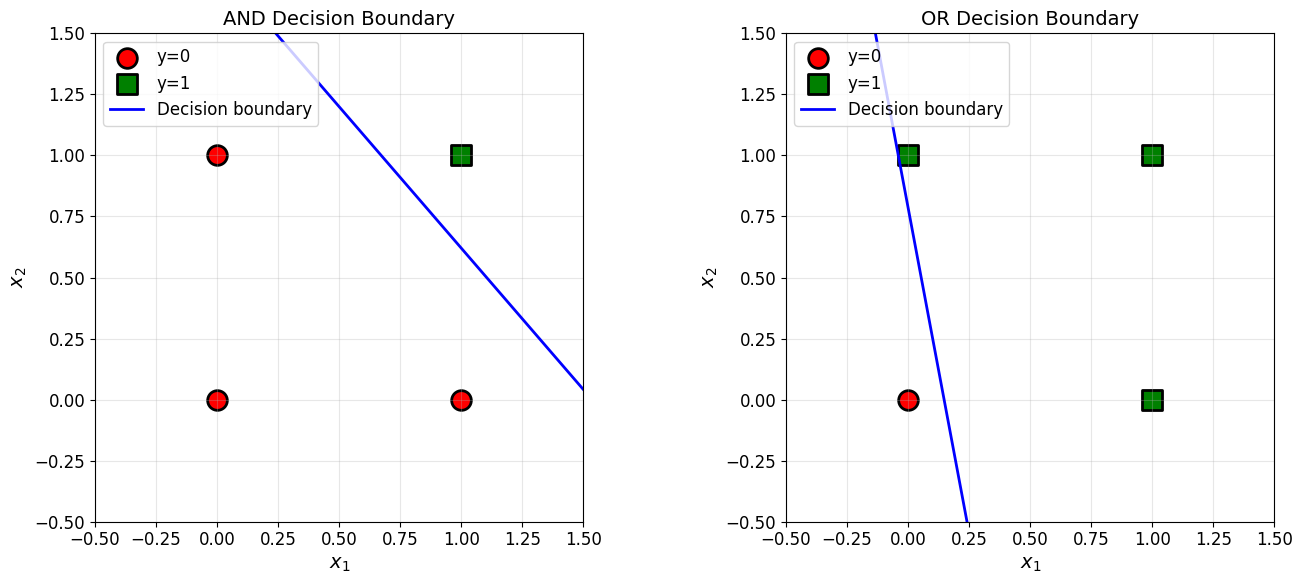

Discussion
------------------------------------------------------------
AND: The decision boundary seperates (1, 1) from the other three points.
     The line passes 'above' most points, classifying only the top-right as 1.

OR:  The decision boundary seperates (0, 0) from the other three points.
     The line passes 'below' most points, classifying only the origin as 0.

Both are solvable because in each case, the two classes can be seperated
by a single straight line - they are LITERALLY SEPERABLE.


In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

plot_decision_boundary(X_and, y_and, perceptron_and.weights, perceptron_and.bias, 
                       "AND Decision Boundary", ax=ax1)

plot_decision_boundary(X_or, y_or, perceptron_or.weights, perceptron_or.bias, 
                       "OR Decision Boundary", ax=ax2)

plt.tight_layout()
plt.show()

# Discussion
print("Discussion")
print("-" * 60)
print("AND: The decision boundary seperates (1, 1) from the other three points.")
print("     The line passes 'above' most points, classifying only the top-right as 1.")
print()
print("OR:  The decision boundary seperates (0, 0) from the other three points.")
print("     The line passes 'below' most points, classifying only the origin as 0.")
print()
print("Both are solvable because in each case, the two classes can be seperated")
print("by a single straight line - they are LITERALLY SEPERABLE.")



## Exercise 4
<hr>

### 4.1 Attempt to Train a Single Perceptron for XOR

In [17]:
X_xor = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_xor = np.array([0, 1, 1, 0])

print("XOR Training Data:")
print("X:")
print(X_xor)
print("y:", y_xor)

XOR Training Data:
X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [0 1 1 0]


In [18]:
# Create perceptron
perceptron_xor = Perceptron(n_inputs=2, learning_rate=0.1)

print("\nAttempting to train perceptron for XOR...")
print("(Using 100 epochs to demonstrate non-convergence)")

# Train (store the history for later visualisation)
history_xor = perceptron_xor.train(X_xor, y_xor, epochs=100, verbose=False)

print("\nTraining completed after 100 epochs.")
print("Final weights: ", perceptron_xor.weights)
print("Final bias: ", perceptron_xor.bias)


Attempting to train perceptron for XOR...
(Using 100 epochs to demonstrate non-convergence)

Training completed after 100 epochs.
Final weights:  [-0.24191639  0.06617615]
Final bias:  0.0011150117432087991


In [19]:
# Test on all inputs
print("\nTesting XOR perceptron (single layer):")
print("-" * 40)
all_correct = True
incorrect = 0

for i in range(len(X_xor)):
    prediction = perceptron_xor.predict(X_xor[i])
    correct = "✓" if prediction == y_xor[i] else "✗"
    
    if prediction != y_xor[i]:
        all_correct = False
        incorrect += 1
    
    print(f"Input: {X_xor[i]} -> Predicted: {prediction}, Expected: {y_xor[i]} {correct}")

print("-" * 40)
print(f"Accuracy: {len(y_xor) - incorrect}/{len(y_xor)} = {((len(y_xor) - incorrect) / len(y_xor)) * 100}%")

print("\n\u26A0\uFE0F The perceptron CANNOT learn XOR with a single layer!")


Testing XOR perceptron (single layer):
----------------------------------------
Input: [0 0] -> Predicted: 1, Expected: 0 ✗
Input: [0 1] -> Predicted: 1, Expected: 1 ✓
Input: [1 0] -> Predicted: 0, Expected: 1 ✗
Input: [1 1] -> Predicted: 0, Expected: 0 ✓
----------------------------------------
Accuracy: 2/4 = 50.0%

⚠️ The perceptron CANNOT learn XOR with a single layer!


### 4.2 Visualise Why XOR is Linearly Inseperable

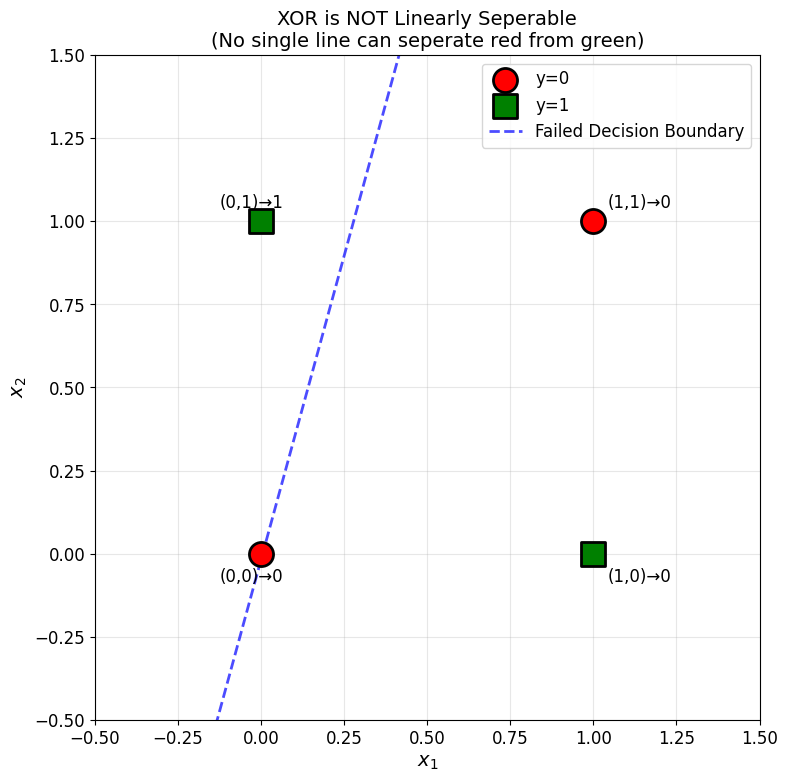

In [20]:
# Visualise XOR data points and failed decision boundary
fig, ax = plt.subplots(figsize=(8, 8))

# Plot points
for i in range(len(X_xor)):
    if y_xor[i] == 0:
        ax.scatter(X_xor[i, 0], X_xor[i, 1], c='red', marker='o', s=300,
                   edgecolors='black', linewidths=2, zorder=5,
                   label='y=0' if i == 0 else '')
        
    else:
        ax.scatter(X_xor[i, 0], X_xor[i, 1], c='green', marker='s', s=300,
                   edgecolors='black', linewidths=2, zorder=5,
                   label='y=1' if i == 1 else '')
        
# Add labels to points
ax.annotate('(0,0)→0', (0, 0), textcoords="offset points", xytext=(-30, -20), fontsize=12)
ax.annotate('(0,1)→1', (0, 1), textcoords="offset points", xytext=(-30, 10), fontsize=12)
ax.annotate('(1,0)→0', (1, 0), textcoords="offset points", xytext=(10, -20), fontsize=12)
ax.annotate('(1,1)→0', (1, 1), textcoords="offset points", xytext=(10, 10), fontsize=12)

# Plot the failed decision boundary
x1_range = np.linspace(-0.5, 1.5, 100)
if abs(perceptron_xor.weights[1]) > 1e-10:
    x2_boundary = -(perceptron_xor.weights[0] / perceptron_xor.weights[1]) * x1_range \
                  - (perceptron_xor.bias / perceptron_xor.weights[1])
    ax.plot(x1_range, x2_boundary, 'b--', linewidth=2, alpha=0.7,
            label="Failed Decision Boundary")
    
# Formatting
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_title('XOR is NOT Linearly Seperable\n(No single line can seperate red from green)',
             fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

### 4.3 Visualise AND, OR, and XOR Together

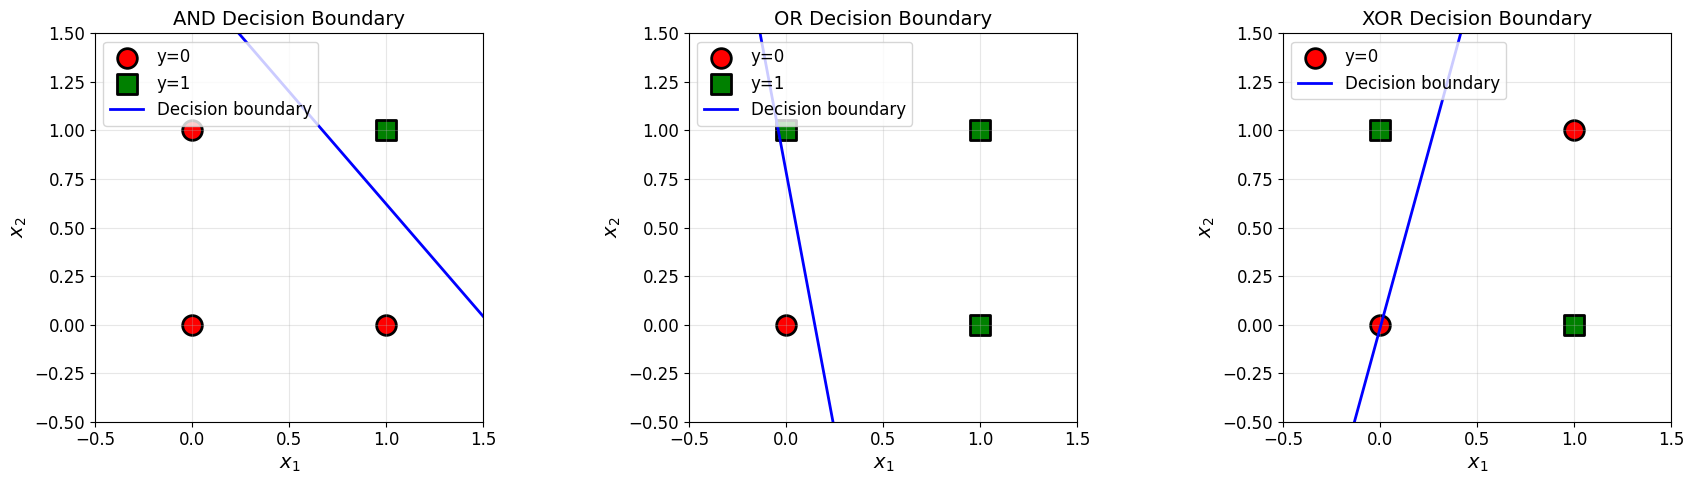

Figure saved as 'linear_separability_comparison.png'


In [21]:
# Create 3-panel comparison figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

plot_decision_boundary(X_and, y_and, perceptron_and.weights, perceptron_and.bias, 
                       "AND Decision Boundary", ax=ax1)

plot_decision_boundary(X_or, y_or, perceptron_or.weights, perceptron_or.bias, 
                       "OR Decision Boundary", ax=ax2)

plot_decision_boundary(X_xor, y_xor, perceptron_xor.weights, perceptron_xor.bias, 
                       "XOR Decision Boundary", ax=ax3)

plt.tight_layout()
plt.savefig('linear_separability_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("Figure saved as 'linear_separability_comparison.png'")

## Exercise 5
<hr>

### 5.1 Implement Multi-Layer Perceptron with Pre-defined Weights

In [22]:
# Two-layered perceptron with pre-defined weights
def xor_two_layer_manual(x1, x2, verbose=False):
    """
    Compute XOR using a two-layer perceptron with pre-defined weights.
    
    Architecture based on lecture slides (slide 45):
    - Hidden neuron 1: fires when at most one input is 1 (-x1 - x2 + 1.5 >= 0)
    - Hidden neuron 2: fires when at least one input is 1 (x1 + x2 >= 0.5)
    - Output neuron: h1 AND h2 (both hidden neurons must fire)
    
    Parameters:
    -----------
    x1, x2 : int
        Input values (0 or 1)
    verbose : bool
        If True, print intermediate calculations
    Returns:
    --------
    int : XOR result (0 or 1)
    """

    # Step function
    step = lambda x: 1 if x >= 0 else 0

    # Hidden layer
    # Perceptron 1: w1=-1, w2=-1, b=+1.5 (fires when at most one input is 1)
    h1_sum = x1 * (-1) + x2 * (-1) + 1.5
    h1 = step(h1_sum)

    # Perceptron 2: w1=+1, w2=+1, b=-0.5 (fires when at least one input is 1)
    h2_sum = x1 * 1 + x2 * 1 - 0.5
    h2 = step(h2_sum)

    # Output layer
    # Perceptron 3: w1=+1, w2=+1, b=-1.5 (fires when w1 AND w2)
    y_sum = h1 + h2 - 1.5
    y = step(y_sum)


    if verbose:
        print(f"    Input: ({x1}, {x2})")
        print(f"    Hidden 1: {x1}*(-1) + {x2}*(-1) + 1.5 = {h1_sum:.1f} -> h1 = {h1}")
        print(f"    Hidden 2: {x1}*1 + {x2}*1 -0.5 = {h2_sum:.1f} -> h2 = {h2}")
        print(f"    Output  : {h1}*1 + {h2}*1 - 1.5 = {y_sum:.1f} -> y = {y}")

    return y

In [23]:
# Test
print("Testing two-layer perceptron for XOR (manual weights):")
print("=" * 60)

all_correct = True
for x1 in [0, 1]:
    for x2 in [0, 1]:
        result = xor_two_layer_manual(x1, x2, verbose=True)
        expected = x1 ^ x2
        correct = '✓' if result == expected else '✗'
        if result != expected: 
            all_correct = False
        
        print(f"    Result: XOR({x1}, {x2}) = {result}, Expected: {expected} {correct}")
        print()

Testing two-layer perceptron for XOR (manual weights):
    Input: (0, 0)
    Hidden 1: 0*(-1) + 0*(-1) + 1.5 = 1.5 -> h1 = 1
    Hidden 2: 0*1 + 0*1 -0.5 = -0.5 -> h2 = 0
    Output  : 1*1 + 0*1 - 1.5 = -0.5 -> y = 0
    Result: XOR(0, 0) = 0, Expected: 0 ✓

    Input: (0, 1)
    Hidden 1: 0*(-1) + 1*(-1) + 1.5 = 0.5 -> h1 = 1
    Hidden 2: 0*1 + 1*1 -0.5 = 0.5 -> h2 = 1
    Output  : 1*1 + 1*1 - 1.5 = 0.5 -> y = 1
    Result: XOR(0, 1) = 1, Expected: 1 ✓

    Input: (1, 0)
    Hidden 1: 1*(-1) + 0*(-1) + 1.5 = 0.5 -> h1 = 1
    Hidden 2: 1*1 + 0*1 -0.5 = 0.5 -> h2 = 1
    Output  : 1*1 + 1*1 - 1.5 = 0.5 -> y = 1
    Result: XOR(1, 0) = 1, Expected: 1 ✓

    Input: (1, 1)
    Hidden 1: 1*(-1) + 1*(-1) + 1.5 = -0.5 -> h1 = 0
    Hidden 2: 1*1 + 1*1 -0.5 = 1.5 -> h2 = 1
    Output  : 0*1 + 1*1 - 1.5 = -0.5 -> y = 0
    Result: XOR(1, 1) = 0, Expected: 0 ✓



### 5.2 Visualise the Two Hyperplanes

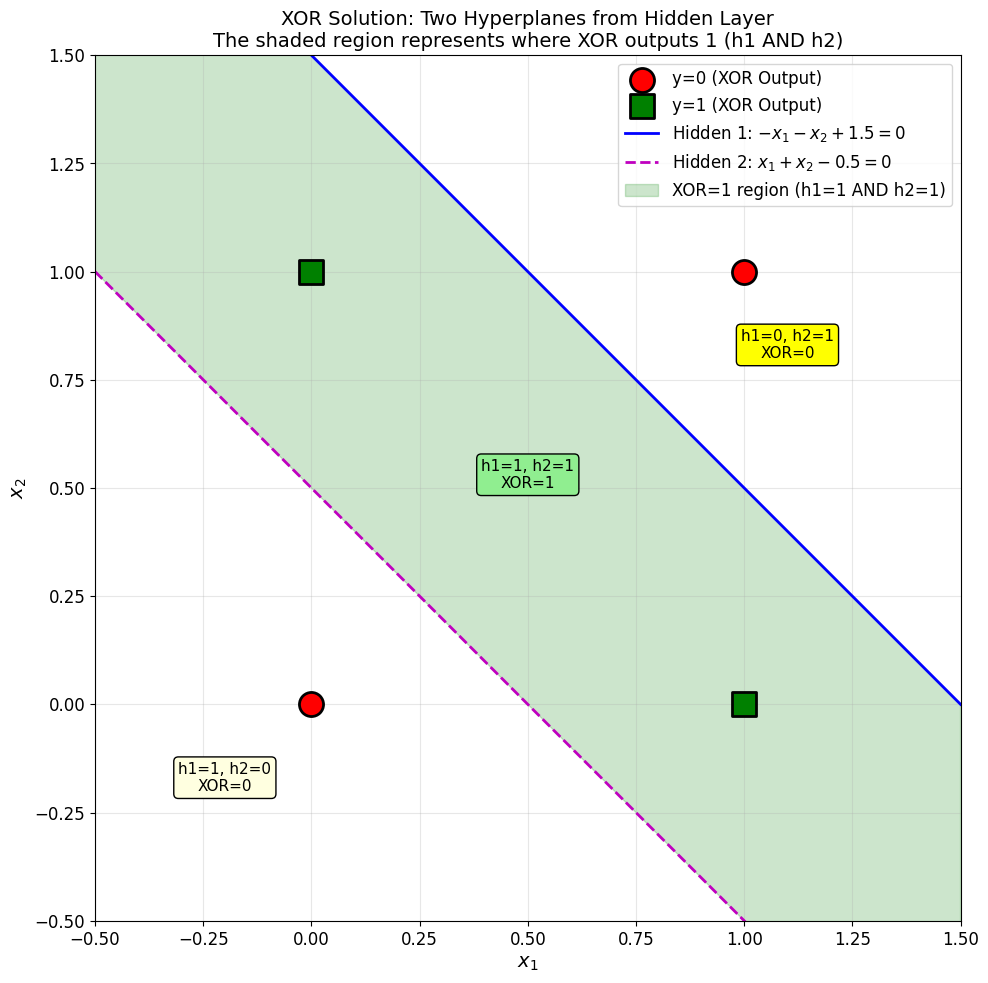

Figure saves as 'xor_two_hyperplanes.png'


In [24]:
# Visualise the two hyperplanes from the hidden layer
fig, ax = plt.subplots(figsize=(10, 10))

# Plot data points
for i in range(len(X_xor)):
    if y_xor[i] == 0:
        ax.scatter(X_xor[i, 0], X_xor[i, 1], c='red', marker='o', s=300,
                   edgecolors='black', linewidth=2, zorder=5, 
                   label='y=0 (XOR Output)' if i == 0 else '')
    
    else:
        ax.scatter(X_xor[i, 0], X_xor[i, 1], c='green', marker='s', s=300,
                   edgecolors='black', linewidth=2, zorder=5, 
                   label='y=1 (XOR Output)' if i == 1 else '')
        
# Define the two hyperplanes from hidden layer
x1_range = np.linspace(-0.5, 1.5, 100)

# Hidden neuron 1: -x1 - x2 + 1.5 = 0 => x2 = -x1 + 1.5
x2_h1 = -x1_range + 1.5
ax.plot(x1_range, x2_h1, 'b-', linewidth=2, label='Hidden 1: $-x_1 - x_2 + 1.5 = 0$')

# Hidden neuron 2: x1 + x2 - 0.5 = 0 => x2 = -x1 + 0.5
x2_h2 = -x1_range + 0.5
ax.plot(x1_range, x2_h2, 'm--', linewidth=2, label='Hidden 2: $x_1 + x_2 - 0.5 = 0$')

# Shade regions
# Region where XOR = 1 (between the two lines, where both h1=1 and h2=1)
ax.fill_between(x1_range, x2_h2, x2_h1, alpha=0.2, color='green',
                label='XOR=1 region (h1=1 AND h2=1)')

# Add annotations 
ax.annotate('h1=1, h2=0\nXOR=0', xy=(-0.2, -0.2), fontsize=11, ha='center',
            bbox=dict(boxstyle='round', facecolor='lightyellow'))

ax.annotate('h1=1, h2=1\nXOR=1', xy=(0.5, 0.5), fontsize=11, ha='center',
            bbox=dict(boxstyle='round', facecolor='lightgreen'))

ax.annotate('h1=0, h2=1\nXOR=0', xy=(1.1, 0.8), fontsize=11, ha='center',
            bbox=dict(boxstyle='round', facecolor='yellow'))

# Formatting
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_title('XOR Solution: Two Hyperplanes from Hidden Layer\n' \
             'The shaded region represents where XOR outputs 1 (h1 AND h2)', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')
ax.set_aspect('equal')

plt.tight_layout()
plt.savefig('xor_two_hyperplanes.png', dpi=150, bbox_inches='tight')
plt.show()

print("Figure saves as 'xor_two_hyperplanes.png'")


### 5.3 Implement a Trainable Two-Layer Network

In [25]:
class TwoLayerPerceptron:
    """
    A two-layer perceptron (MLP) for XOR using sigmoid activation.
    This is a preview for Lab 2 concepts.
    """

    def __init__(self, input_size=2, hidden_size=2, output_size=1, learning_rate=0.5):
        """
        Initialise the network
        """

        self.learning_rate = learning_rate

        # Weights: input -> hidden
        self.weights_ih = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.bias_h = np.random.uniform(-1, 1, hidden_size)

        # Weights: hidden -> output
        self.weights_ho = np.random.uniform(-1, 1, (hidden_size, output_size))
        self.bias_o = np.random.uniform(-1, 1, output_size)

    def sigmoid(self, x):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    
    def sigmoid_derivative(self, x):
        """Derivative of sigmoid: σ'(x) = σ(x)(1 - σ(x))."""
        s = self.sigmoid(x)
        return s * (1 - s)

    def forward(self, X):
        """
        Forward pass through the network.

        Returns intermediate values needed for backpropagation.
        """

        # Inputs to hidden
        self.z_h = np.dot(X, self.weights_ih) + self.bias_h
        self.a_h = self.sigmoid(self.z_h)

        # Hidden to output
        self.z_o = np.dot(self.a_h, self.weights_ho) + self.bias_o
        self.a_o = self.sigmoid(self.z_o)

        return self.a_o
    
    def backward(self, X, y):
        """Backward pass (propagation)"""
        
        m = X.shape[0]  # Number of samples

        # Output layer error
        output_error = y - self.a_o
        output_delta = output_error * self.sigmoid_derivative(self.z_o)

        # Hidden layer error
        hidden_error = np.dot(output_delta, self.weights_ho.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.z_h)

        # Update eights and biases
        self.weights_ho += self.learning_rate * np.dot(self.a_h.T, output_delta) / m
        self.bias_o += self.learning_rate * np.mean(output_delta, axis=0)

        self.weights_ih += self.learning_rate * np.dot(X.T, hidden_delta) / m
        self.bias_h += self.learning_rate * np.mean(hidden_delta, axis=0)

    def train(self, X, y, epochs, verbose_interval=1000):
        """Train the network"""

        losses = []

        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)

            # Compute loss (MSE)
            loss = np.mean((output - y.reshape(-1, 1)) ** 2)
            losses.append(loss)

            # Backward pass
            self.backward(X, y)

            if epoch % verbose_interval == 0:
                print(f"Epoch {epoch}: Loss = {loss:.6f}")

        return losses
    
    def predict(self, X):
        """Make predictions (rounded to 0 or 1)."""

        output = self.forward(X)
        return (output >= 0.5).astype(int).flatten()

In [26]:
# Train the network
print("Training two-layer network for XOR (with backpropagation):")
print("=" * 60)

np.random.seed(42)
y_xor = y_xor.reshape(-1, 1)  # Reshape targets to (n_samples, 1)
mlp = TwoLayerPerceptron(hidden_size=4, learning_rate=2.0)

losses = mlp.train(X_xor, y_xor, epochs=10001, verbose_interval=2000)

# Test
print("\nTesting trained network:")
print("-" * 40)

predictions = mlp.predict(X_xor)

for i in range(len(X_xor)):
    correct = "✓" if predictions[i] == y_xor[i] else "✗"
    print(f"XOR({X_xor[i][0]}, {X_xor[i][1]}) = {predictions[i]}, \
          Expected: {y_xor[i]} {correct}")
    
print("-" * 40)
accuracy = np.mean(predictions == y_xor.flatten()) * 100
print(f"Accuracy: {accuracy:.1f}%")

Training two-layer network for XOR (with backpropagation):
Epoch 0: Loss = 0.315398
Epoch 2000: Loss = 0.002133
Epoch 4000: Loss = 0.000789
Epoch 6000: Loss = 0.000475
Epoch 8000: Loss = 0.000338
Epoch 10000: Loss = 0.000262

Testing trained network:
----------------------------------------
XOR(0, 0) = 0,           Expected: [0] ✓
XOR(0, 1) = 1,           Expected: [1] ✓
XOR(1, 0) = 1,           Expected: [1] ✓
XOR(1, 1) = 0,           Expected: [0] ✓
----------------------------------------
Accuracy: 100.0%


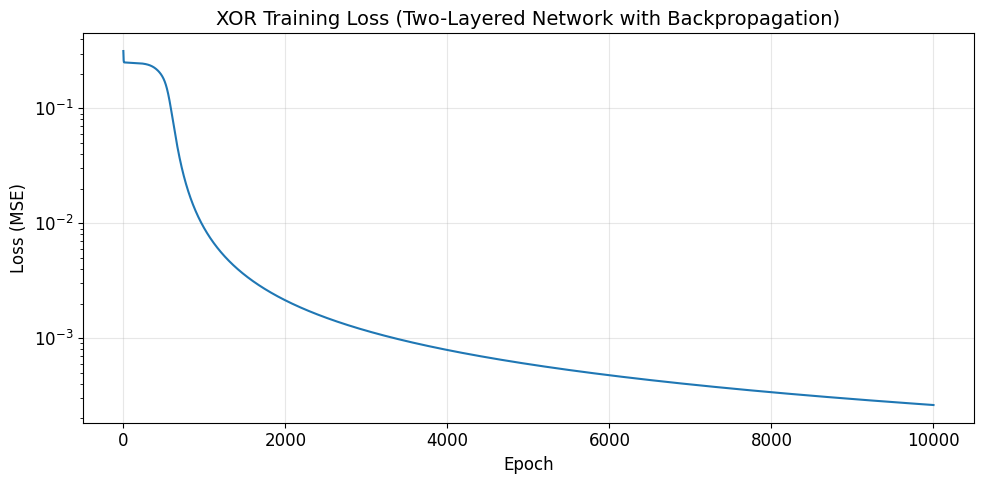

Figure saved as 'xor_training_loss.png'


In [27]:
# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.title('XOR Training Loss (Two-Layered Network with Backpropagation)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.tight_layout()
plt.savefig('xor_training_loss.png', dpi=150, bbox_inches='tight')
plt.show()

print("Figure saved as 'xor_training_loss.png'")